About the Dataset

The following data is from this link: https://www.kaggle.com/datasets/uciml/iris?resource=download

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.


In [248]:
#import numpy
import pandas as pd

#import pandas
import numpy as np

In [249]:
#read the csv file in the page
iris = pd.read_csv('Project\Iris Flower Project\Iris.csv')

In [250]:
#first 10 numbers in the dataset
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [251]:
#iris column name
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [252]:
#I dropped Id because it will not help us with our analysis
iris.drop(['Id'],axis=1,inplace=True)

Here we will go in depth of what each column means

Id = the unique identification each sepal is given

SepalLengthCm = is the length of the sepal (cm)

SepalWidthCm = is the width of the sepal (cm)

PetalLengthCm = is the length of the petal (cm)

PetalWidthCm = is the Width of the petal (cm)

Species = the species type for the specific flower

In [253]:
#Find all the unique species in the dataset
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [254]:
#Data Visualization

#Import Matplotlib
import matplotlib.pyplot as plt

#import Seaborn
import seaborn as sns

<Axes: xlabel='Species', ylabel='count'>

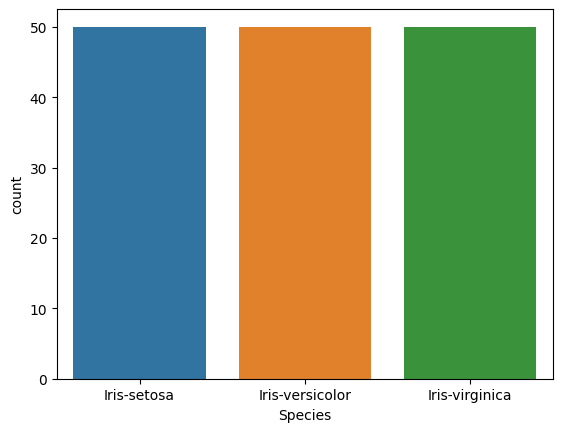

In [255]:
#count plot
sns.countplot(data = iris, x = "Species")

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

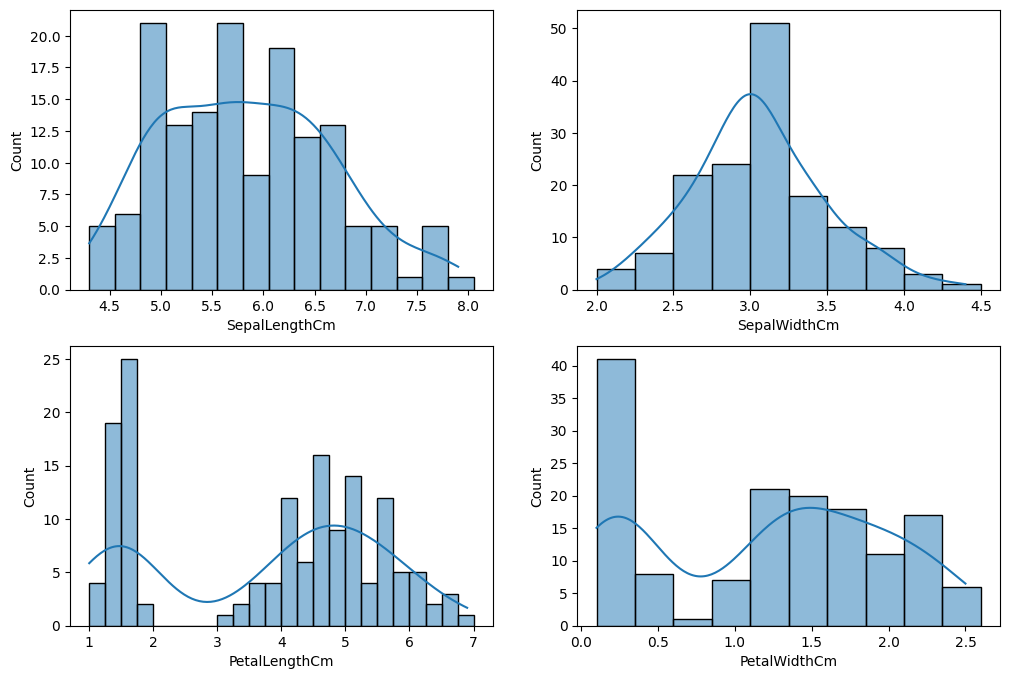

In [256]:
#Creating the figure for analysis
fig, axs = plt.subplots(ncols=2, nrows=2, figsize = (12,8))

#Creating Histogram to see distribution in the data
sns.histplot(data = iris, x = "SepalLengthCm", binwidth=.25, kde = True, ax = axs[0,0])
sns.histplot(data = iris, x = "SepalWidthCm", binwidth=.25, kde = True, ax = axs[0,1])
sns.histplot(data = iris, x = "PetalLengthCm", binwidth=.25, kde = True, ax = axs[1,0])
sns.histplot(data = iris, x = "PetalWidthCm", binwidth=.25, kde = True, ax = axs[1,1])

For Petal Length you see two humps. This is interesting as it tells me something is off with the data. To get a better understanding I will make another histogram but color coded with the type of Species. Maybe its a different type of species that represents the other hump.

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

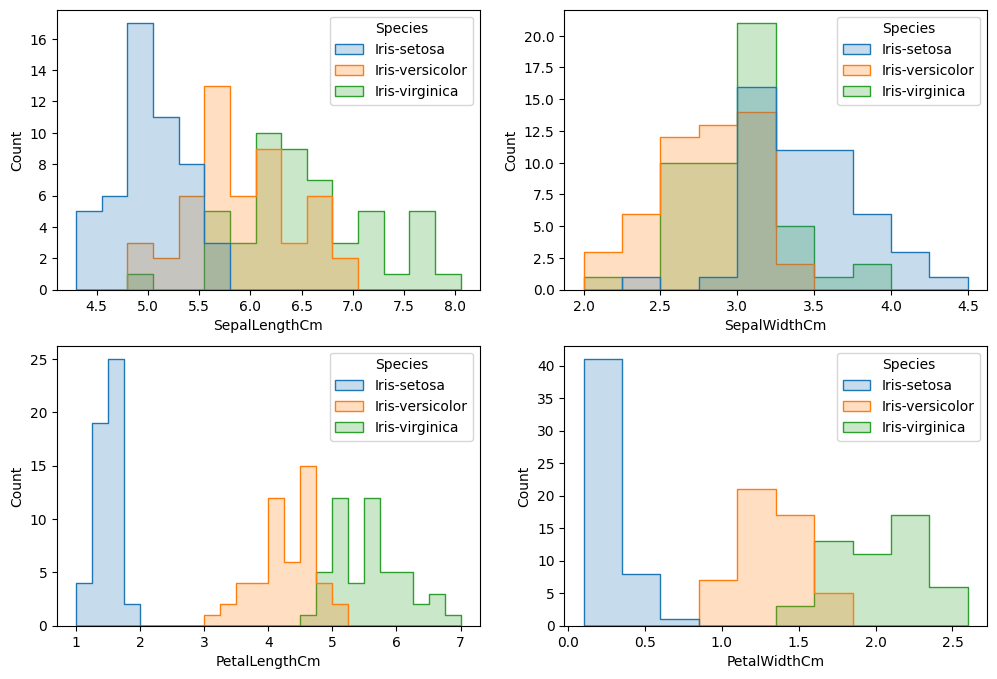

In [257]:
#Creating the figure for analysis
fig, axs = plt.subplots(ncols=2, nrows=2, figsize = (12,8))

#Creating more histograms but this time color coding each with the unique species
sns.histplot(data = iris, x = "SepalLengthCm", binwidth=.25, hue = "Species", element = "step", ax = axs[0,0])
sns.histplot(data = iris, x = "SepalWidthCm", binwidth=.25, hue = "Species", element = "step", ax = axs[0,1])
sns.histplot(data = iris, x = "PetalLengthCm", binwidth=.25, hue = "Species", element = "step", ax = axs[1,0])
sns.histplot(data = iris, x = "PetalWidthCm", binwidth=.25, hue = "Species", element = "step", ax = axs[1,1])

As you can see Iris-Setosa is the one that is causing the Petal Length and Width to shift to have multiples humps.

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

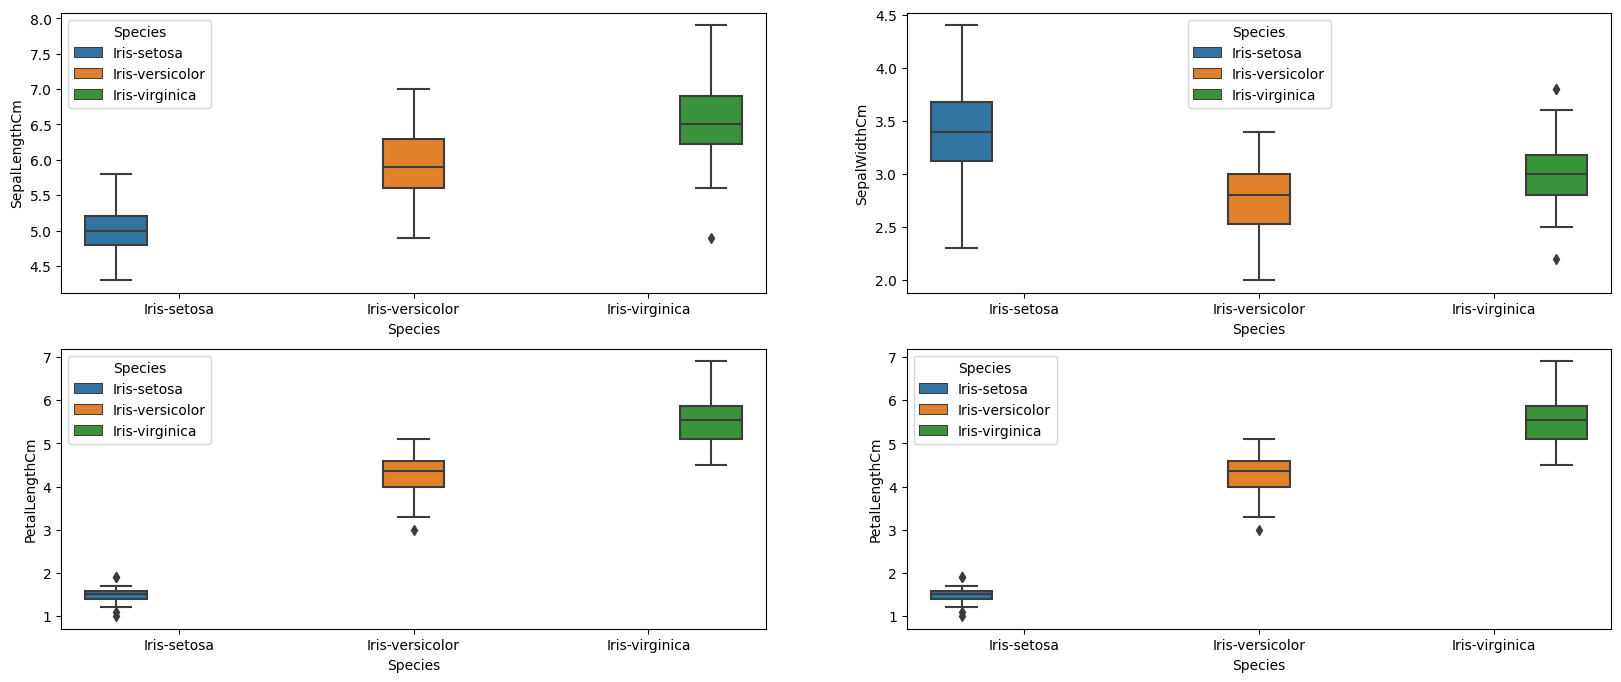

In [258]:
#Creating the figure for analysis
fig, axs = plt.subplots(ncols=2, nrows=2, figsize = (20,8))

#Boxplot
sns.boxplot(data = iris, y = "SepalLengthCm", x = "Species", hue = "Species", ax = axs[0,0])
sns.boxplot(data = iris, y = "SepalWidthCm", x = "Species", hue = "Species", ax = axs[0,1])
sns.boxplot(data = iris, y = "PetalLengthCm", x = "Species", hue = "Species", ax = axs[1,0])
sns.boxplot(data = iris, y = "PetalLengthCm", x = "Species", hue = "Species", ax = axs[1,1])

There seems to be a relationship between the Petal Length and Petal Width. I will plot them in a scatterplot and create a linear model.

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

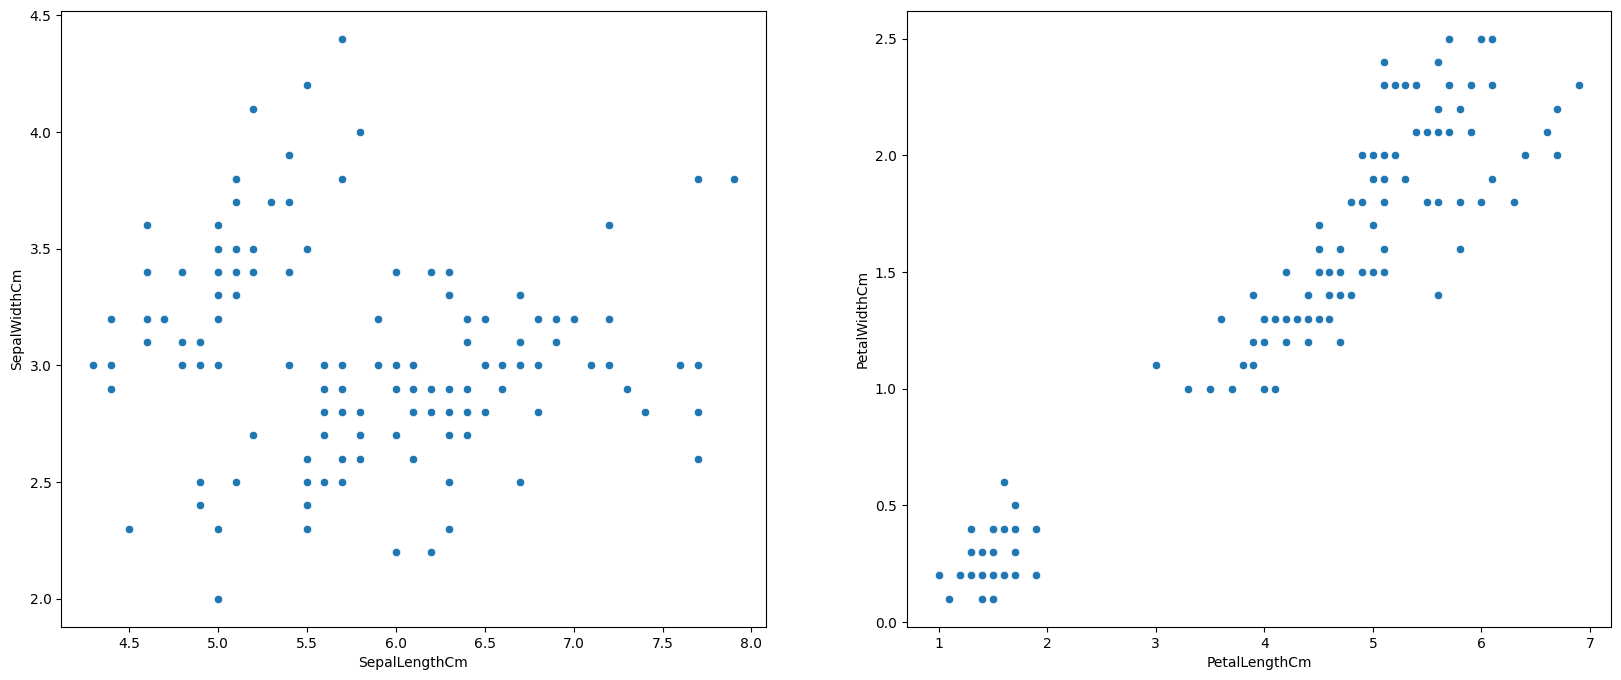

In [259]:
# Scatter Plot

#Creating Figure
fig, axs = plt.subplots(figsize = (20,8), ncols=2)

#Scatterplot
sns.scatterplot(data = iris, x = "SepalLengthCm", y = "SepalWidthCm", ax = axs[0])
sns.scatterplot(data = iris, x = "PetalLengthCm", y = "PetalWidthCm", ax = axs[1])

There looks like there could be something affecting the scatterplot. You see them seperating. And getting more apart the further away you get to the graph. 

I will plot the species. 

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

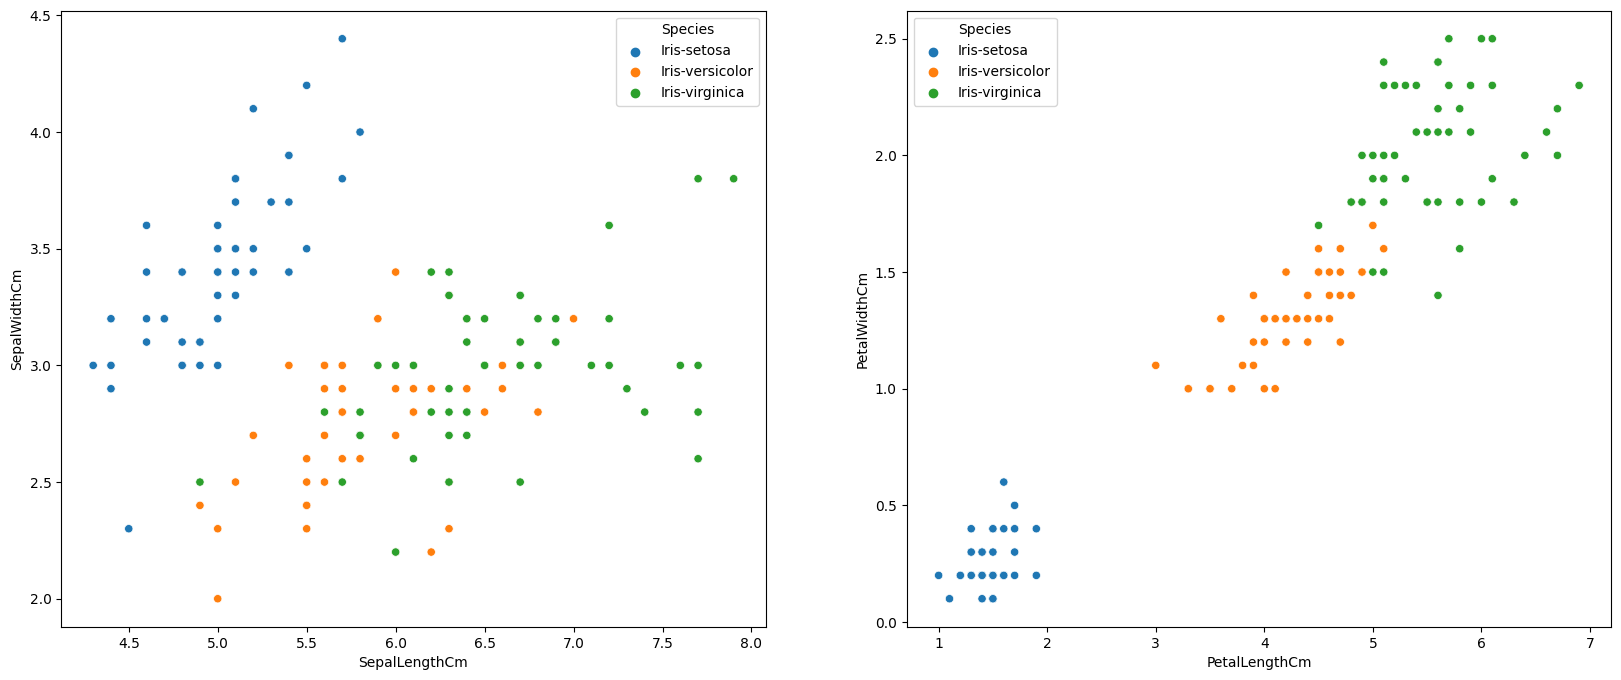

In [260]:
# Scatter Plot

#Creating Figure
fig, axs = plt.subplots(figsize = (20,8), ncols=2)

#Scatterplot
sns.scatterplot(data = iris, x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species", ax = axs[0])
sns.scatterplot(data = iris, x = "PetalLengthCm", y = "PetalWidthCm", hue = "Species", ax = axs[1])

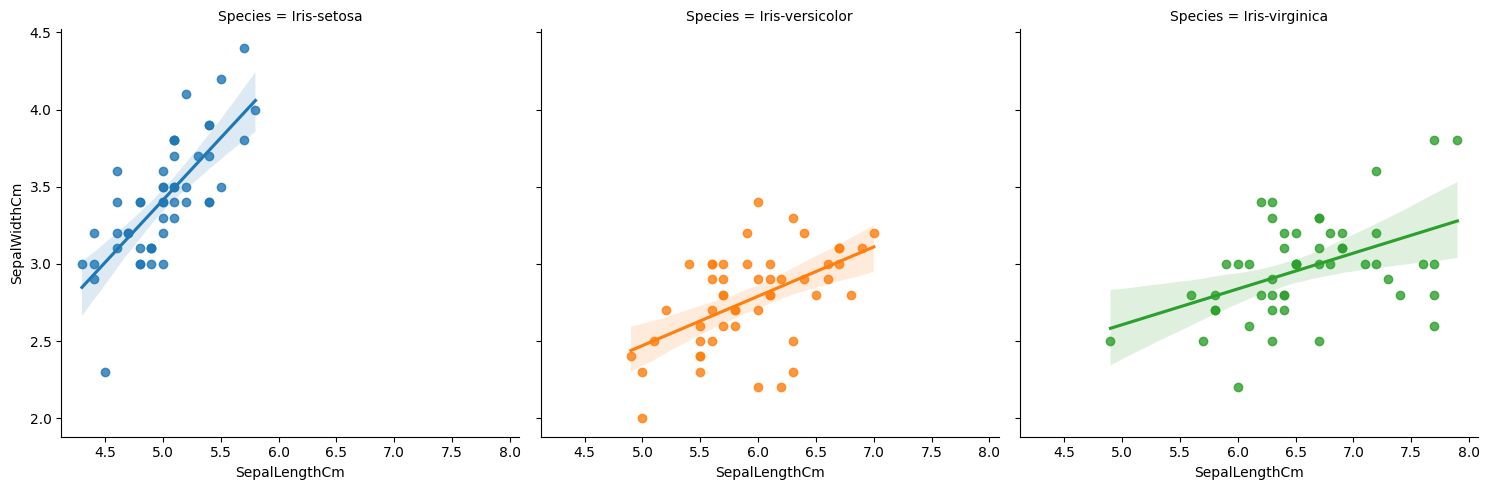

In [261]:
#Linear Regression

#Each column signifies the type of Species of plant
sns.lmplot(data = iris, x = "SepalLengthCm", y = "SepalWidthCm", col = "Species", hue = "Species")

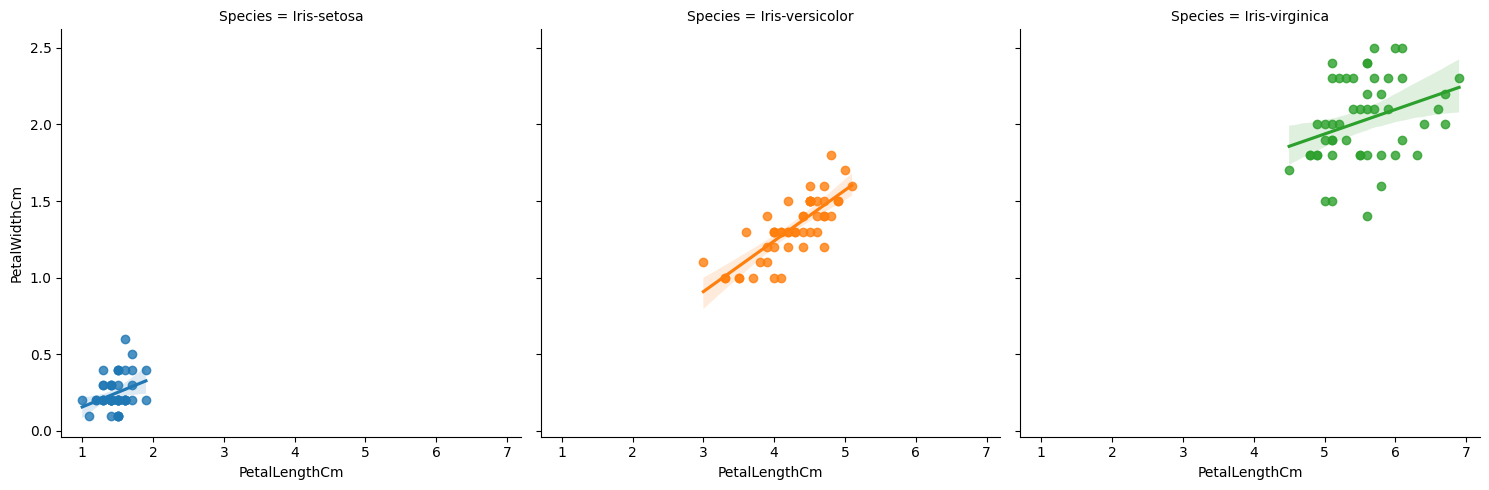

In [262]:
#Linear Regression

##Each column signifies the type of Species of plant
sns.lmplot(data = iris, x = "PetalLengthCm", y = "PetalWidthCm", col = "Species", hue = "Species")

There does seem to have a linear relationship between them. I will find the correlation of each.

C:\Users\Sierr\AppData\Local\Temp\ipykernel_16088\1017178255.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot = True, cmap = "Blues")


<Axes: >

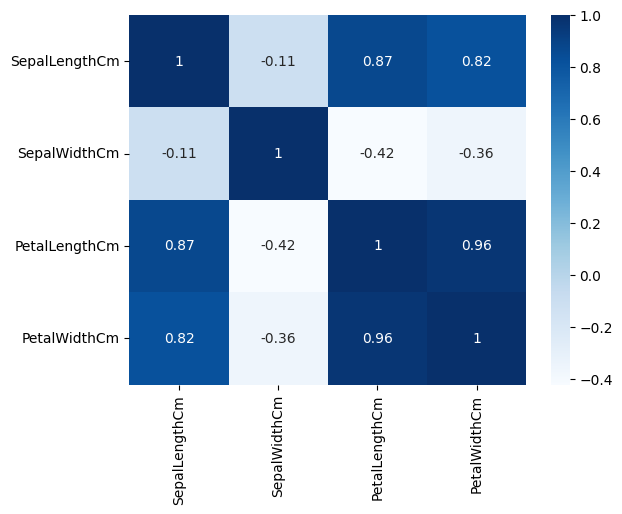

In [263]:
#Heatmap
sns.heatmap(iris.corr(), annot = True, cmap = "Blues")

If we take a closer look and do the correlation for each individual species, we may get a different result.

In [264]:
#correlation groubed by species
correlation = iris.groupby("Species")[["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]].corr()
correlation

PetalLengthCm  PetalWidthCm  SepalLengthCm  \
Species                                                                     
Iris-setosa     PetalLengthCm       1.000000      0.306308       0.263874   
                PetalWidthCm        0.306308      1.000000       0.279092   
                SepalLengthCm       0.263874      0.279092       1.000000   
                SepalWidthCm        0.176695      0.279973       0.746780   
Iris-versicolor PetalLengthCm       1.000000      0.786668       0.754049   
                PetalWidthCm        0.786668      1.000000       0.546461   
                SepalLengthCm       0.754049      0.546461       1.000000   
                SepalWidthCm        0.560522      0.663999       0.525911   
Iris-virginica  PetalLengthCm       1.000000      0.322108       0.864225   
                PetalWidthCm        0.322108      1.000000       0.281108   
                SepalLengthCm       0.864225      0.281108       1.000000   
                SepalWidthCm        0.401045      0.537728       0.457228   

                               SepalWidthCm  
Species                                      
Iris-setosa     PetalLengthCm      0.176695  
                PetalWidthCm       0.279973  
                SepalLengthCm      0.746780  
                SepalWidthCm       1.000000  
Iris-versicolor PetalLengthCm      0.560522  
                PetalWidthCm       0.663999  
                SepalLengthCm      0.525911  
                SepalWidthCm       1.000000  
Iris-virginica  PetalLengthCm      0.401045  
                PetalWidthCm       0.537728  
                SepalLengthCm      0.457228  
                SepalWidthCm       1.000000